In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$57K-$102K (Glassdoor est.),A trusted partner at nearly three million comm...,3.6,Ecolab\n3.6,"Saint Paul, MN",-1,10000+ Employees,1923,Company - Public,Chemical Manufacturing,Manufacturing,$10+ billion (USD),-1,0,0,57,102,79.5,Ecolab\n,MN,0,97,1,0,0,1,0
1,Data Scientist,$57K-$102K (Glassdoor est.),Overview\n\n\nWe are looking for a great Data ...,4.5,Intuit - Data\n4.5,"Mountain View, CA",-1,5001 to 10000 Employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$5 to $10 million (USD),-1,0,0,57,102,79.5,Intuit - Data\n,CA,0,37,1,0,0,0,0
2,Data Scientist,$57K-$102K (Glassdoor est.),Description\n\nPosition at Homes.com\n\nHomes....,4.1,Homes.com\n4.1,"Norfolk, VA",-1,201 to 500 Employees,1998,Company - Private,Real Estate,Real Estate,$50 to $100 million (USD),-1,0,0,57,102,79.5,Homes.com\n,VA,0,22,1,0,0,0,1
3,Data Scientist,$57K-$102K (Glassdoor est.),The ExtraHop platform is a novel approach to p...,3.9,"ExtraHop Networks, Inc.\n3.9","Seattle, WA",-1,501 to 1000 Employees,2007,Company - Private,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),-1,0,0,57,102,79.5,"ExtraHop Networks, Inc.\n",WA,0,13,1,0,0,0,1
4,Data Analyst,$57K-$102K (Glassdoor est.),Breckenridge Grand Vacations (BGV) is seeking ...,4.3,Breckenridge Grand Vacations\n4.3,"Breckenridge, CO",-1,501 to 1000 Employees,1984,Company - Private,"Hotels, Motels, & Resorts",Travel & Tourism,$10 to $25 million (USD),-1,0,0,57,102,79.5,Breckenridge Grand Vacations\n,CO,0,36,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'artificial intelligence' in title.lower():
        return 'aie'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

na                228
mle                85
data scientist     54
data engineer      41
analyst            33
manager             6
aie                 2
director            1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        317
senior    133
Name: seniority, dtype: int64

In [9]:
# Fix state Los Angeles 
#df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()


CA    147
VA     46
MA     30
NY     19
TX     18
MD     18
WA     18
US     15
FL     12
GA     11
MN     11
OH     10
MI      9
PA      9
CO      8
IL      8
UT      7
NJ      6
NC      6
MO      5
IN      4
OR      4
IA      3
WI      3
DC      3
TN      3
AZ      2
AL      2
CT      2
PR      2
DE      2
AR      2
LA      1
KY      1
MS      1
ID      1
VT      1
Name: job_state, dtype: int64

In [10]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      6517
1      2686
2      2608
3      3895
4      5746
       ... 
445    4769
446    3830
447    1474
448    4379
449    2687
Name: desc_len, Length: 450, dtype: int64

In [11]:
#Competitor count
#df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

df['Competitors'].value_counts()

-1    450
Name: Competitors, dtype: int64

In [12]:
df['Competitors']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
445   -1
446   -1
447   -1
448   -1
449   -1
Name: Competitors, Length: 450, dtype: int64

In [13]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [15]:
df['max_salary']

0      102
1      102
2      102
3      102
4      102
      ... 
445    163
446    163
447    163
448    163
449    163
Name: max_salary, Length: 450, dtype: int64

In [16]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [17]:
df['company_txt']

0                            Ecolab
1                     Intuit - Data
2                         Homes.com
3           ExtraHop Networks, Inc.
4      Breckenridge Grand Vacations
                   ...             
445                       Wi-Tronix
446                           Starz
447              Lenora Systems Inc
448                       Bloomberg
449                           Apple
Name: company_txt, Length: 450, dtype: object

In [18]:
df.describe()

,Rating,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len
count,450.000000,450.0,450.000000,450.0,450.0,450.0,450.000000,450.000000,450.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.00000
mean,3.787333,-1.0,1801.831111,-1.0,0.0,0.0,89.455556,141.828889,115.642222,0.0,29.448889,0.604444,0.002222,0.186667,0.293333,0.404444,3799.94000
std,1.030123,0.0,580.018699,0.0,0.0,0.0,29.689020,32.020936,30.042060,0.0,34.536425,0.489514,0.047140,0.390077,0.455797,0.491330,1595.62315
min,-1.000000,-1.0,-1.000000,-1.0,0.0,0.0,47.000000,94.000000,71.500000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.00000
25%,3.500000,-1.0,1965.000000,-1.0,0.0,0.0,65.000000,108.000000,86.500000,0.0,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2729.50000
50%,3.900000,-1.0,1996.500000,-1.0,0.0,0.0,92.000000,151.000000,121.500000,0.0,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3577.50000
75%,4.300000,-1.0,2009.000000,-1.0,0.0,0.0,109.000000,161.000000,146.500000,0.0,37.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4742.00000
max,5.000000,-1.0,2020.000000,-1.0,0.0,0.0,139.000000,212.000000,174.500000,0.0,201.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10776.00000


In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

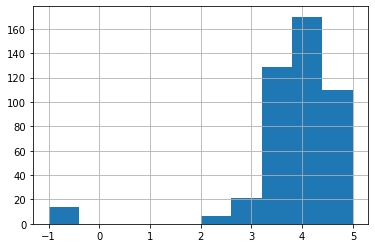

In [20]:
df.Rating.hist()

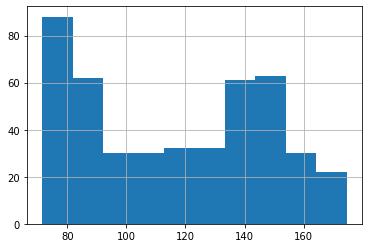

In [21]:
df.avg_salary.hist()

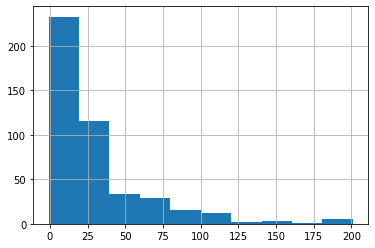

In [22]:
df.age.hist()

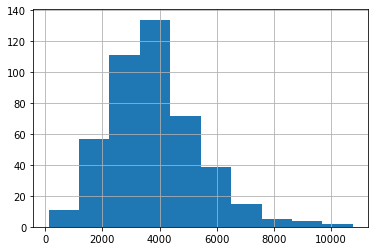

In [23]:
df.desc_len.hist()

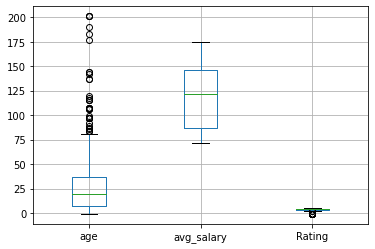

In [24]:
df.boxplot(column = ['age','avg_salary','Rating'])

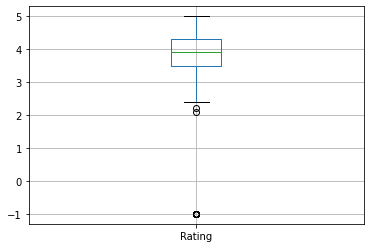

In [25]:
df.boxplot(column = 'Rating')

In [26]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.008541,0.002533,0.152714
avg_salary,0.008541,1.000000,-0.018786,0.130971
Rating,0.002533,-0.018786,1.000000,-0.044826
desc_len,0.152714,0.130971,-0.044826,1.000000


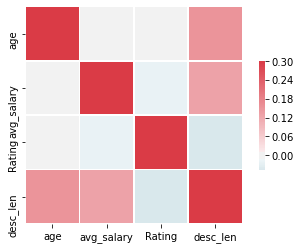

In [27]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [29]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 168


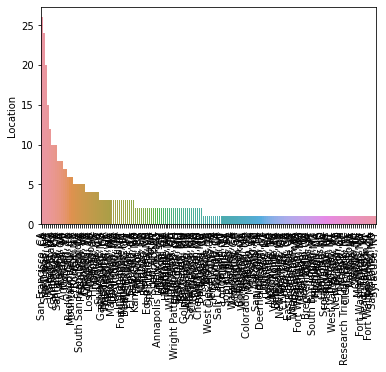

graph for Headquarters: total = 1


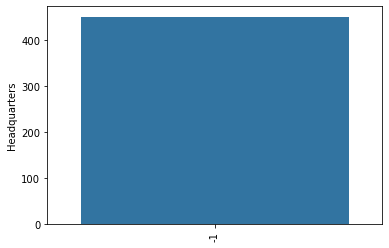

graph for Size: total = 9


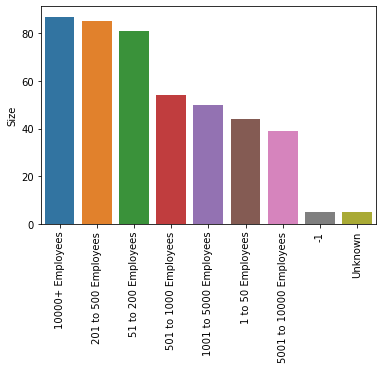

graph for Type of ownership: total = 10


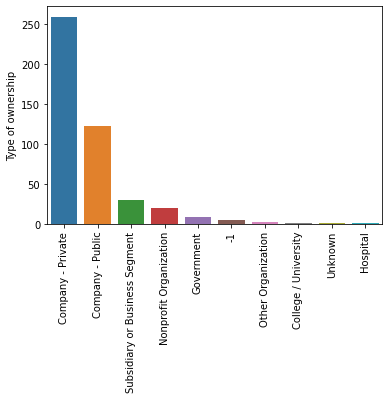

graph for Industry: total = 56


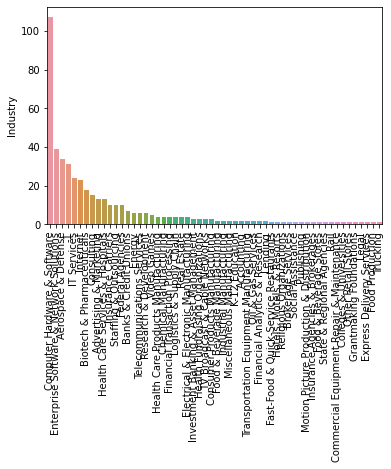

graph for Sector: total = 23


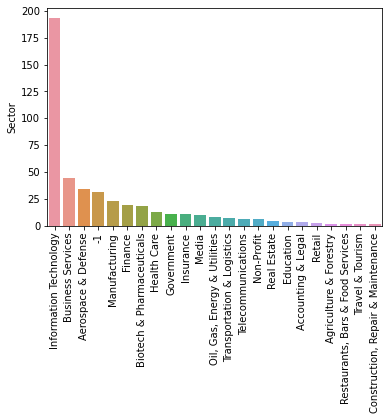

graph for Revenue: total = 14


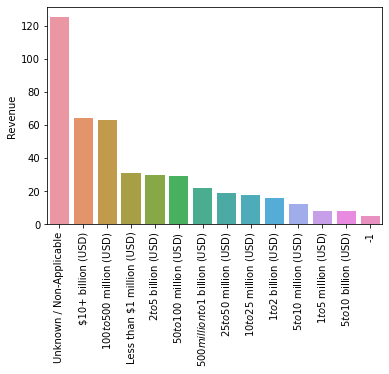

graph for company_txt: total = 319


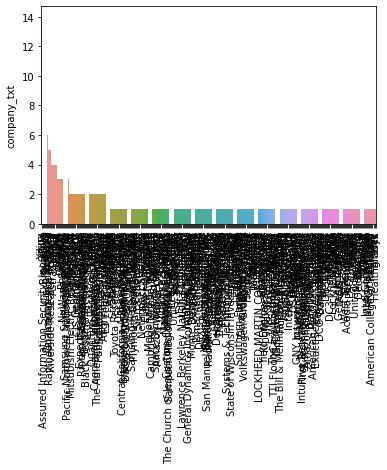

graph for job_state: total = 37


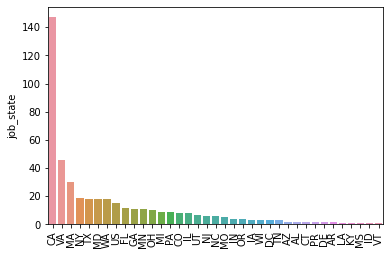

graph for same_state: total = 1


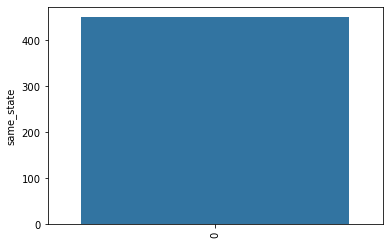

graph for python_yn: total = 2


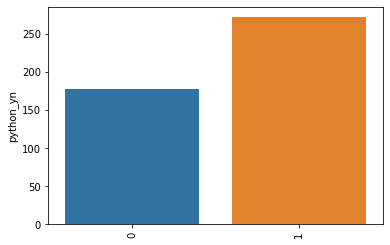

graph for R_yn: total = 2


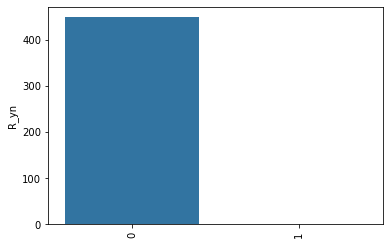

graph for spark: total = 2


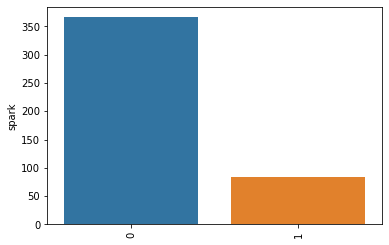

graph for aws: total = 2


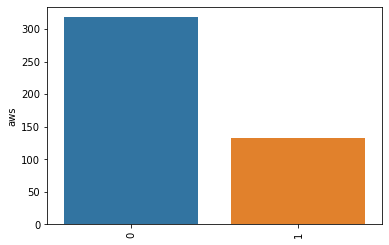

graph for excel: total = 2


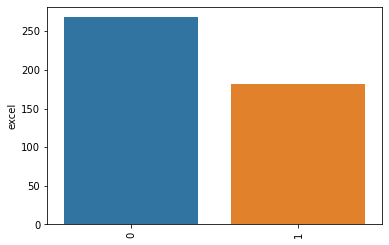

graph for job_simp: total = 8


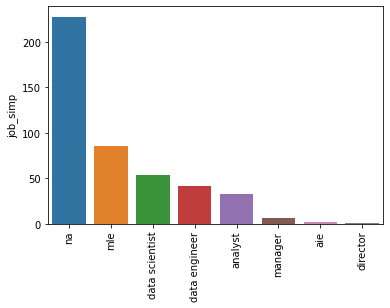

graph for seniority: total = 2


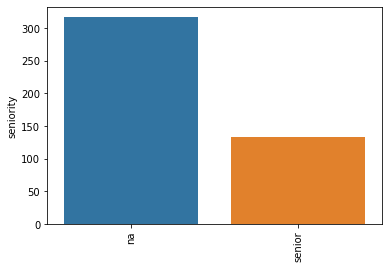

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


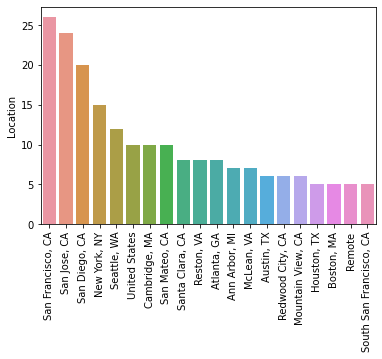

graph for Headquarters: total = 1


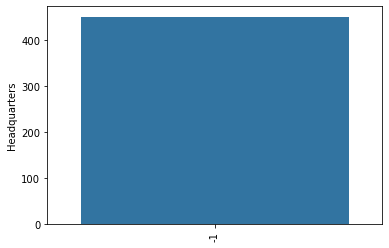

graph for company_txt: total = 20


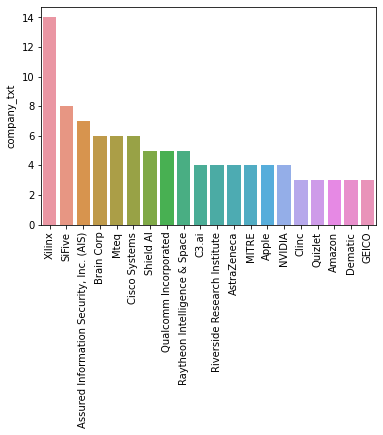

In [31]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [32]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [33]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
aie,154.500000
analyst,117.803030
data engineer,118.134146
data scientist,109.777778
director,86.500000
manager,124.083333
mle,113.558824
na,116.611842


In [34]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
aie            senior     154.500000
analyst        na         114.416667
               senior     126.833333
data engineer  na         122.151515
               senior     101.562500
data scientist na         105.150000
               senior     123.000000
director       na          86.500000
manager        na         128.400000
               senior     102.500000
mle            na         115.900000
               senior     102.633333
na             na         114.079861
               senior     120.952381

In [35]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na              121.500000
          data scientist   79.500000
          analyst         125.500000
WA        na               94.214286
          mle             121.833333
...                              ...
AZ        mle             147.500000
AR        data scientist  174.500000
          mle             102.500000
AL        na              146.500000
          analyst         146.500000

[121 rows x 1 columns]

In [36]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [37]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       1
          data scientist           1
          analyst                  1
WA        na                       7
          mle                      3
          data scientist           7
          data engineer            1
VT        mle                      1
VA        na                      22
          mle                      9
          data scientist           6
          data engineer            7
          analyst                  1
          aie                      1
UT        data engineer            1
          analyst                  2
          na                       3
          data scientist           1
US        na                       7
          mle                      2
          data scientist           1
          data engineer            4
          analyst                  1
TX        na                       5
          mle                      5
          manager                  1
          data scientist           3
          data engineer            2
          analyst                  2
TN        data scientist           1
          analyst                  1
          na                       1
PR        na                       2
PA        na                       2
          mle                      2
          data scientist           2
          data engineer            1
          analyst                  2
OR        na                       2
          mle                      1
          manager                  1
OH        na                       7
          mle                      1
          data scientist           2
NY        mle                      4
          data scientist           3
          analyst                  2
          data engineer            2
          na                       7
          manager                  1
NJ        na                       1
          data scientist           1
          data engineer            2
          analyst                  2
NC        na                       4
          data scientist           1
          analyst                  1
MS        analyst                  1
MO        data scientist           1
          na                       2
          data engineer            1
          analyst                  1
MN        na                       4
          director                 1
          data scientist           4
          data engineer            2
MI        na                       4
          mle                      3
          manager                  1
          data engineer            1
MD        na                      11
          data scientist           4
          data engineer            1
          analyst                  2
MA        mle                      8
          data scientist           5
          data engineer            2
          na                      15
LA        mle                      1
KY        na                       1
IN        na                       2
          analyst                  2
IL        na                       5
          mle                      2
          analyst                  1
ID        na                       1
IA        na                       2
          mle                      1
GA        analyst                  1
          data scientist           1
          data engineer            1
          mle                      2
          na                       6
FL        na                       6
          mle                      3
          manager                  1
          data scientist           1
          analyst                  1
DE        na                       1
          aie                      1
DC        na                       1
          mle                      1
          analyst                  1
CT        data scientist           1
          na                       1
CO        na                       3
          mle                 

In [38]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
AR,174.500000
OH,127.000000
WA,126.214286
MD,126.000000
UT,125.500000
NC,121.500000
NJ,121.500000
CO,121.500000
MN,114.000000


In [39]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [40]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [44]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

Rating
        avg_salary
Rating            
 2.1    154.500000
 2.5    136.500000
 2.8    134.000000
 3.8    128.375000
 4.0    128.109375
 2.7    125.500000
 3.5    121.953125
 2.2    121.500000
 4.9    121.222222
 3.1    120.375000
 3.0    120.000000
 3.2    118.235294
 2.9    116.500000
 4.1    116.361111
 2.6    115.333333
 3.4    114.153846
 3.3    113.361111
 3.7    113.305556
 4.7    113.266667
 5.0    112.500000
 4.6    112.261905
 4.3    110.775000
 3.6    110.694444
 4.4    110.437500
-1.0    109.071429
 4.5    109.000000
 3.9    107.370370
 2.4    106.750000
 4.8    102.722222
 4.2    101.200000
Industry
                                           avg_salary
Industry                                             
Legal                                      174.500000
Grantmaking Foundations                    174.500000
Food Production                            174.500000
Commercial Equipment Repair & Maintenance  154.500000
Financial Analytics & Research             154.50000

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [45]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),7,9
$1 to $5 million (USD),2,6
$10 to $25 million (USD),8,10
$10+ billion (USD),20,44
$100 to $500 million (USD),37,26
$2 to $5 billion (USD),15,15
$25 to $50 million (USD),9,10
$5 to $10 billion (USD),6,2
$5 to $10 million (USD),4,8


In [46]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [47]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

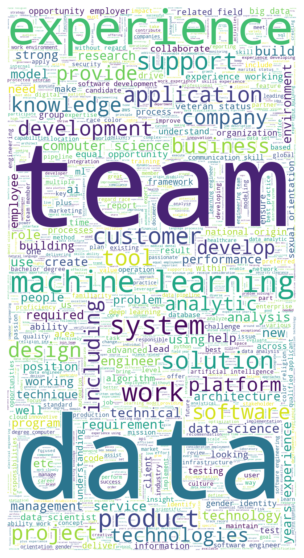

In [48]:
words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
df.to_csv('eda_data.csv')